# Estadística Aplicada
Producto Integrador de Aprendizaje, a 23 de noviembre de 2023

Grupo 41

#### **Equipo pandas**
- Carlos Arriaga, Jessica Patricia - 1951946
- Cruz Alonso, Leidy Laura - 1950261
- Hurtado Trejo, Carlos de Jesús - 1963732
- Ruiz Rodriguez, Patricio - 1897914
- Ulloa Gamez, Aaron Eduardo - 1953392

In [2]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Librerías especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import seasonal_decompose
import pmdarima as pm

In [4]:
# Datos
igae = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/IGAE.csv')
igae.head()

,Periodos,IGAE
0,1993/01,60.407691
1,1993/02,61.022521
2,1993/03,63.943249
3,1993/04,61.865984
4,1993/05,63.612900


**1. Introducción.**

En la presente notebook se realizará un Análisis de Serie de tiempo de la base "IGAE.csv" que contiene el Indicador Global de la Actividad Económica de México (variable "IGAE") y la fecha en que fue medida (variable "Periodos"). La serie de datos cuenta con un total de 355 observaciones y tiene una periodicidad mensual de enero de 1993 al mes de julio de 2022.

El IGAE es un indicador que muestra la evolución de la actividad económica del país, con periodicidad mensual y una oportunidad prevista entre 57 y 60 días después de concluido el mes de referencia, comúnmente utilizado en México como una aproximación del PIB mensual. Su cobertura geográfica es nacional e incorpora a las Actividades Primarias, Secundarias y Terciarias alcanzando el 82.5% del valor agregado bruto a precios básicos del año 2003, año base de todos los productos del Sistema de Cuentas Nacionales Mexicanas (SCNM).

 A continuación se muestra una gráfica de la serie para tener una mayor visualización de estos.

In [5]:
## Dar formato de fecha
igae['Periodos'] = pd.to_datetime(igae['Periodos'],format='%Y/%m')

In [6]:
## Hacerlo index y establecer frecuencia
igae = igae.set_index('Periodos')
igae=igae.asfreq('MS')
igae.head()

,IGAE
Periodos,
1993-01-01,60.407691
1993-02-01,61.022521
1993-03-01,63.943249
1993-04-01,61.865984
1993-05-01,63.612900


In [7]:
igae.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01'],
              dtype='datetime64[ns]', name='Periodos', length=355, freq='MS')

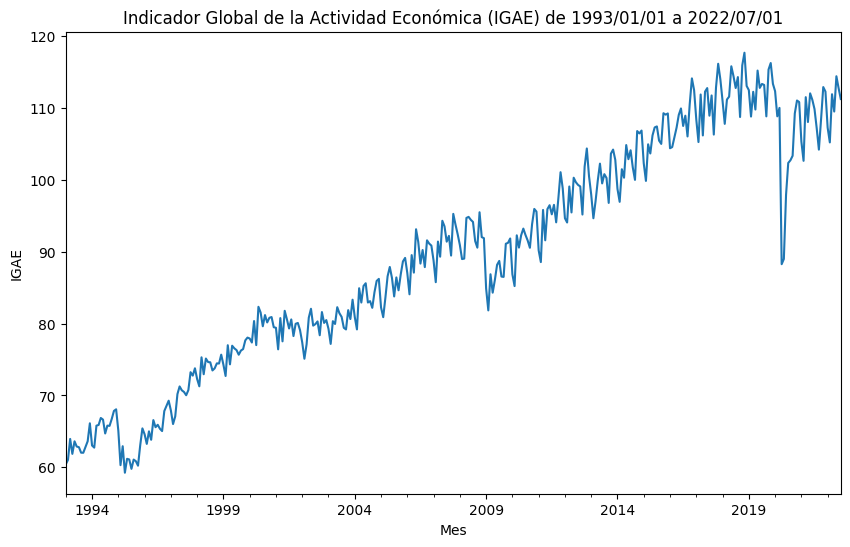

In [8]:
# Gráfica de la serie
igae['IGAE'].plot(figsize = (10,6))
plt.title('Indicador Global de la Actividad Económica (IGAE) de 1993/01/01 a 2022/07/01')
plt.xlabel('Mes')
plt.ylabel('IGAE')
plt.show()

Podemos observar que la serie es multiplicativa y presenta una tendencia creciente (positiva) con ciclos que en su mayoría aumentan.

**2. Estiacionalidad en la serie.**

Podemos observar en la gráfica que éxiste un componente estacional en la serie, ya que en los meses como febrero, abril o septiembre el IGAE disminuye pero, en los meses de marzo, mayo o diciembre el IGAE aumenta. Aunque desconocemos cuáles son las razones precisas de este cambio, es importante destacar que debido a que el IGAE es una serie económica que incorpora información preliminar de las actividades económicas como las agropecuarias, industriales, comerciales y algunas de servicios en un periodo de corto plazo, es normal que se vea afectado por factores que se repiten cada año y cuyas causas puedan considerarse ajenas a la naturaleza económica de las series de este tipo, como las festividades, el hecho de que algunos meses tienen más días que otros, los periodos de vacaciones escolares, el efecto del clima en las diferentes estaciones del año, y otras fluctuaciones estacionales. Por lo que, algunos de estos factores pueden ser la razón de que existan aumentos o disminuciones en la serie que estamos analizando.

**3. Importancia del análisis del IGAE.**

En la mayoría de los países, independientemente del grado de desarrollo que hayan alcanzado, existen desde hace muchos años indicadores generales sobre el comportamiento de la coyuntura económica, con información sobre la evolución mensual de la producción indutrial; los resultados del comercio exterior; el desempeño de las variables fiscales, financieras y monetarias, así como índices de precios al productor o al consumidor. En este sentido, contar con un indicador de tendencia como el Indicador Global de la Actividad Económica (IGAE) resulta útil debido a que hoy en día el flujo constante de la información es cada vez más importante para conocer el estado actual de la economía del país y, de esta forma, generar información útil y oportuna para que los economistas y los hacedores de política formulen políticas para analizar entre otras cosas, el impacto de los diferentes impuestos y los planes de gasto, el impacto del cabo en el precio de petróleo y otras perturbaciones de precios, el impacto de la política monetaria sobre la economía en su conjunto y sobre los componenetes específicos de la demanda final, los ingresos, las industrias, etc.

**4. Estadísticas descriptivas de la serie de tiempo.**

In [9]:
igae.describe()

,IGAE
count,355.000000
mean,89.279287
std,15.901588
min,59.239087
25%,77.458720
50%,89.053256
75%,103.677514
max,117.719440


**5. Cálculo del Promedio Móvil Centrado a 7 meses.**

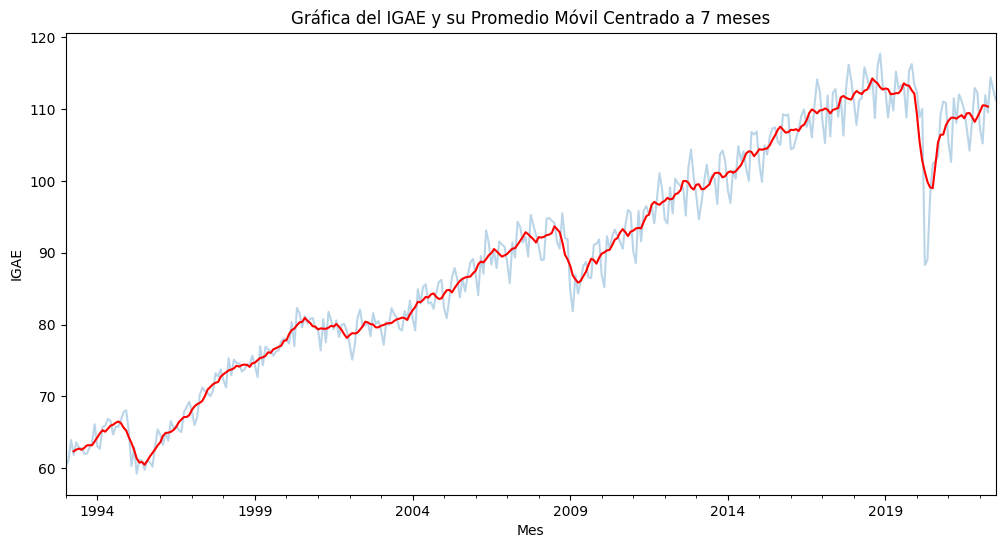

In [16]:
# Promedio móvil centrado a 7 meses
igae['PMC-7'] = igae['IGAE'].rolling(7, center=True).mean()

# Gráfica de la serie original vs. el PMC-7
igae['IGAE'].plot(alpha = 0.3)
igae['PMC-7'].plot(figsize=(12,6), color = 'r')
plt.title('Gráfica del IGAE y su Promedio Móvil Centrado a 7 meses')
plt.xlabel('Mes')
plt.ylabel('IGAE')
plt.show()

**6. Utiliza   la descomposición   estacional,   para   obtener   el   componente estacional, y la serie desestacionalizada.**

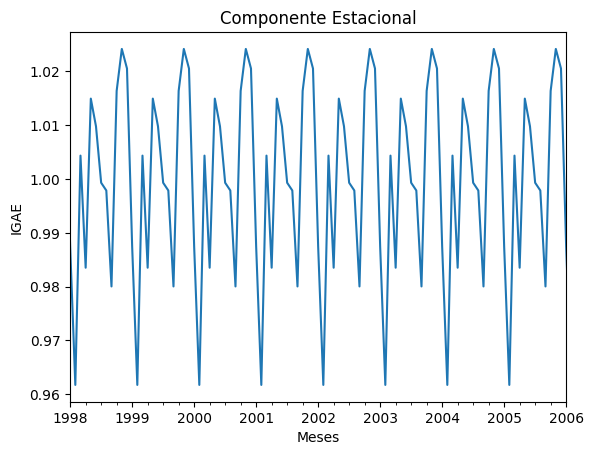

In [17]:
results = seasonal_decompose(igae['IGAE'], model='mul')
results.seasonal.plot()
plt.title('Componente Estacional')
plt.xlabel('Meses')
plt.ylabel('IGAE')
plt.xlim('1998-01-01', '2006-01-01')
plt.show()

In [12]:
comp_est = results.seasonal
igae['IGAE_Des'] = igae['IGAE'] / comp_est

In [13]:
comp_est

Periodos
1993-01-01    0.987469
1993-02-01    0.961743
1993-03-01    1.004340
1993-04-01    0.983515
1993-05-01    1.014927
                ...   
2022-03-01    1.004340
2022-04-01    0.983515
2022-05-01    1.014927
2022-06-01    1.009777
2022-07-01    0.999301
Freq: MS, Name: seasonal, Length: 355, dtype: float64

In [14]:
igae.head()

,IGAE,PMC-7,IGAE_Des
Periodos,,,
1993-01-01,60.407691,NaN,61.174263
1993-02-01,61.022521,NaN,63.449931
1993-03-01,63.943249,NaN,63.666953
1993-04-01,61.865984,62.361841,62.902954
1993-05-01,63.612900,62.593297,62.677318


**7. Utiliza la serie original para hacer el análisis ARIMA**

In [18]:
## Estimamos un ARIMA (1,1)
modelo = ARIMA(igae['IGAE'], order=(1, 1, 1))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  355
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -871.502
Date:                Sun, 12 Nov 2023   AIC                           1749.005
Time:                        23:27:36   BIC                           1760.613
Sample:                    01-01-1993   HQIC                          1753.623
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4083      0.072      5.703      0.000       0.268       0.549
ma.L1         -0.7962      0.062    -12.799      0.000      -0.918      -0.674
sigma2         8.0424      0.256     31.411      0.000       7.541       8.544
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2240.87
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.42   Skew:                            -1.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**8. Realiza  una  prueba  de  raíz  unitaria  para  verificar  si  este  proceso  es estacionario (sino es estacionario conviértelo en estacionario)**

In [19]:
## Prueba de Dickey Fuller aumentada
prueba_adf = adfuller(igae['IGAE'].dropna())
pvalue = prueba_adf[1]
pvalue.round(2)

0.78

0.78 > 0.05 No rechazamos Ho, la serie es no estacionaria

In [20]:
## Aplicamos primeras diferencias
igae['igae_diff'] = igae['IGAE'].diff()


In [21]:
prueba_adf1 = adfuller(igae['igae_diff'].dropna())
pvalue = prueba_adf1[1]
pvalue.round(2)

0.0

0.0 < 0.05 Rechazamos Ho, las primeras diferencias es una serie estacionaria

**9. Con el proceso estacionario, realizalas gráficas de autocorrelación (ACF) y autocorrelación parcial (PACF) y señala como se interpretan**

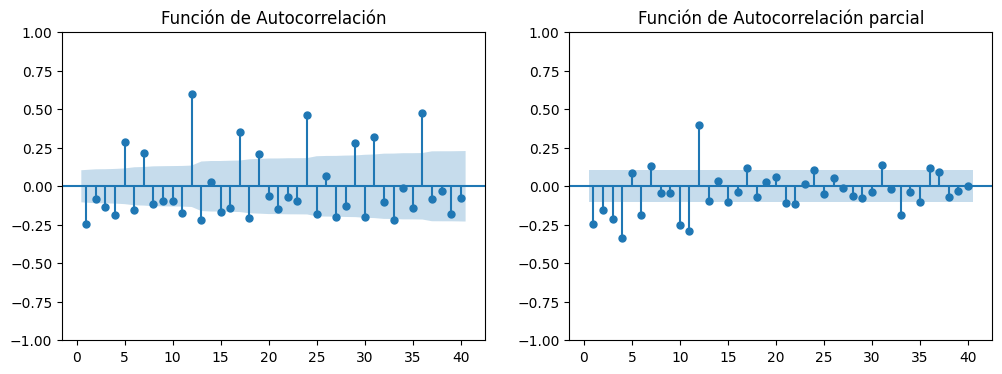

In [22]:
ig, ax=plt.subplots(1,2,figsize=(12,4))
plot_acf(igae['igae_diff'].dropna(),zero=False,lags=40,ax=ax[0],title='Función de Autocorrelación')
ax[0].set_ylim(-1,1)
plot_pacf(igae['igae_diff'].dropna(),zero=False,lags=40,ax=ax[1],title='Función de Autocorrelación parcial')
ax[1].set_ylim(-1,1);

Debido a que las gráficas presentan valores atípicos, esto nos indica que la serie no tiene un componente estacional (no sigue un patrón la gráfica)

**10. Utilizando  el  código auto_arima y  elige  un  criterio  para  seleccionar  el modelo,  ya  seael  criterio  de  akaike  (AIC)  o  el  criterio  bayesiano  de información (BIC)**

In [24]:
pm.auto_arima(igae['IGAE'],   
              start_p=1, max_p=7,
              start_q=1,max_q=7,
              ic='AIC',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=7,max_Q=7)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 3, 12),
      suppress_warnings=True, with_intercept=False)

**11. Estima el modelo ARIMA que hayas elegido e interpreta los coeficientes.**

La función auto_arima sugiere un modelo $\text{SARIMA(1,1,1)(1,0,3,12)}$.

In [24]:
modelo = ARIMA(igae['IGAE'],
               order=(1,1,1), 
               seasonal_order=(1,0,3,12))
results = modelo.fit()
print(results.summary())

                                        SARIMAX Results                                         
Dep. Variable:                                     IGAE   No. Observations:                  355
Model:             ARIMA(1, 1, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -759.015
Date:                                  Sun, 12 Nov 2023   AIC                           1532.031
Time:                                          19:50:25   BIC                           1559.116
Sample:                                      01-01-1993   HQIC                          1542.807
                                           - 07-01-2022                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6994      0.074      9.501      0.000       0.555

Se estimó un modelo $\text{ARIMA(1,1,1)} = \text{ARMA(1,1)}$, cuya ecuación es la siguiente:

**$$Y_t = \mu + \phi Y_{t-1} - \theta_1 \varepsilon_{t-1} + \varepsilon_t$$**

**$$Y_t = \mu + 0.6994 Y_{t-1} - 0.8939 \varepsilon_{t-1} + \varepsilon_t$$**

**donde $\varepsilon_t \sim i.i.d.N(\mu = 0,\sigma^2_{\varepsilon} = 4.0240)$**

**12. Utiliza el modelo estimado para hacer pronósticos, y pronóstica uno, dos, tres, cuatro y cinco periodos. Recuerda que el pronóstico tiene que estar en la escala de la variable original.**

**PRONÓSTICO A UN MES**

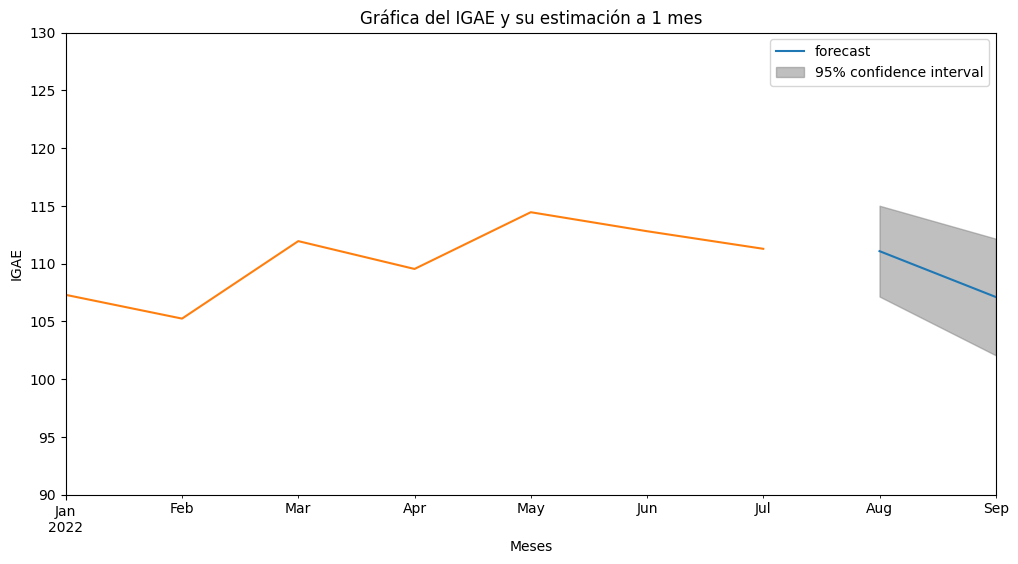

In [73]:
# Definir el inicio y fin del pronóstico
inicio = '2022-08-01'
fin = '2022-09-01'

# Gráfica del pronóstico a 1 mes
plot_predict(results, inicio, fin)
igae['IGAE'].plot(figsize=(12,6))
plt.title('Gráfica del IGAE y su estimación a 1 mes')
plt.xlabel('Meses')
plt.ylabel('IGAE')
plt.xlim('2022-01-01', fin)
plt.ylim(90,130)
plt.show()

In [42]:
# Pronóstico a 1 mes y los intervalos de confianza de este
forecast1 = results.get_forecast(steps=1)
forecast1_mean = forecast1.predicted_mean
forecast1_ci = forecast1.conf_int()

In [44]:
# Intervalos de confinza
forecast1_values = forecast1_mean[inicio:fin]
forecast1_int = forecast1_ci.loc[inicio:fin]

# Juntar en un DataFrame
df_forecast1 = pd.DataFrame({'pronóstico': forecast1_values, 
                            'límite inferior': forecast1_int['lower IGAE'], 
                            'límite superior': forecast1_int['upper IGAE']})
df_forecast1

,pronóstico,límite inferior,límite superior
2022-08-01,111.071466,107.139774,115.003159


In [48]:
print(f'Pronósticamos que para el mes de agosto de 2022, el IGAE estimado será igual a {df_forecast1.iloc[0,0].round(4)}\n Sin embargo, esta cantidad puede variar entre {df_forecast1.iloc[0,1].round(4)} y {df_forecast1.iloc[0,2].round(4)}.')

Pronósticamos que para el mes de agosto de 2022, el IGAE estimado será igual a 111.0715
 Sin embargo, esta cantidad puede variar entre 107.1398 y 115.0032.


**PRONÓSTICO A 2 MESES**

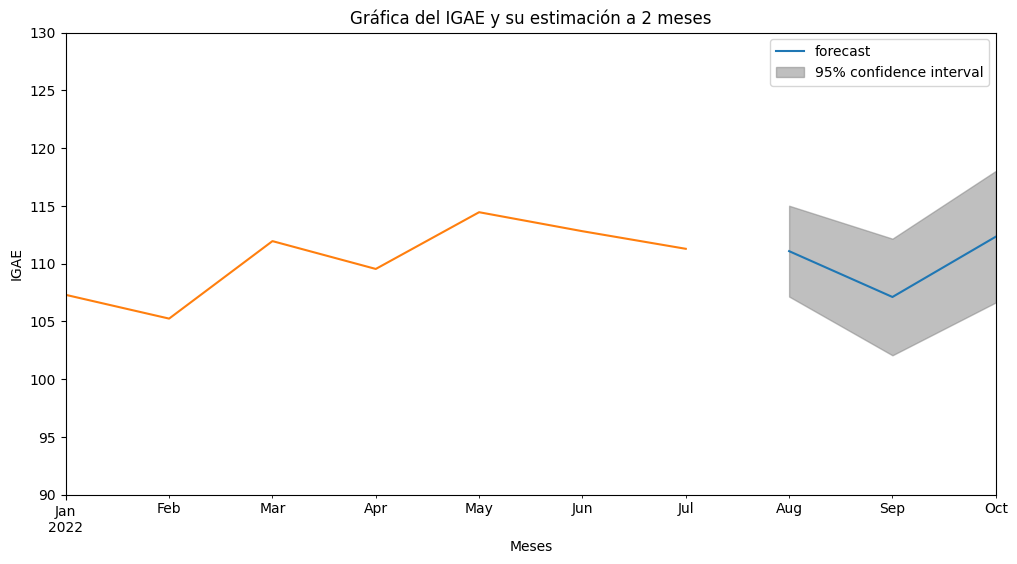

In [72]:
# Definir el inicio y fin del pronóstico
inicio = '2022-08-01'
fin2 = '2022-10-01'

# Gráfica del pronóstico a 1 mes
plot_predict(results, inicio, fin2)
igae['IGAE'].plot(figsize=(12,6))
plt.title('Gráfica del IGAE y su estimación a 2 meses')
plt.xlabel('Meses')
plt.ylabel('IGAE')
plt.xlim('2022-01-01', fin2)
plt.ylim(90,130)
plt.show()

In [45]:
# Pronóstico a 2 mes y sus intervalos de confianza
forecast2 = results.get_forecast(steps=2)
forecast2_mean = forecast2.predicted_mean
forecast2_ci = forecast2.conf_int()

In [46]:
# Intervalos de confinza
forecast2_values = forecast2_mean[inicio:fin2]
forecast2_int = forecast2_ci.loc[inicio:fin2]

# Juntar en un DataFrame
df_forecast2 = pd.DataFrame({'pronóstico': forecast2_values, 
                            'límite inferior': forecast2_int['lower IGAE'], 
                            'límite superior': forecast2_int['upper IGAE']})
df_forecast2

,pronóstico,límite inferior,límite superior
2022-08-01,111.071466,107.139774,115.003159
2022-09-01,107.102644,102.054151,112.151137


In [57]:
print(f'Pronósticamos que para el mes de septiembre de 2022, el IGAE estimado será igual a {df_forecast2.iloc[1,0].round(4)}\n Sin embargo, esta cantidad puede variar entre {df_forecast2.iloc[1,1].round(4)} y {df_forecast2.iloc[1,2].round(4)}.')

Pronósticamos que para el mes de septiembre de 2022, el IGAE estimado será igual a 107.1026
 Sin embargo, esta cantidad puede variar entre 102.0542 y 112.1511.


**PRONÓSTICO A 3 MESES**

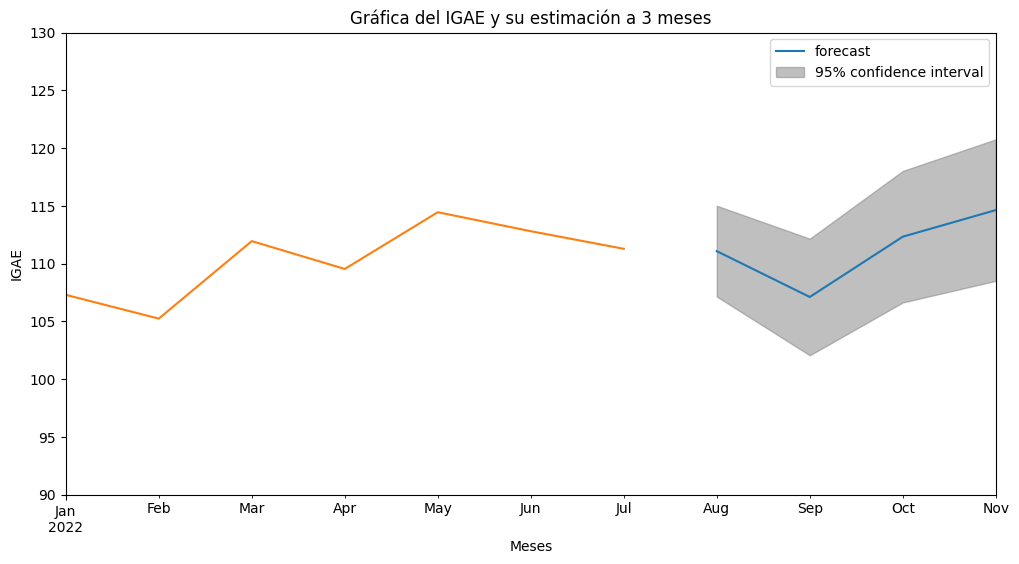

In [67]:
# Definir el inicio y fin del pronóstico
inicio = '2022-08-01'
fin3 = '2022-11-01'

# Gráfica del pronóstico a 1 mes
plot_predict(results, inicio, fin3)
igae['IGAE'].plot(figsize=(12,6))
plt.title('Gráfica del IGAE y su estimación a 3 meses')
plt.xlabel('Meses')
plt.ylabel('IGAE')
plt.xlim('2022-01-01', fin3)
plt.ylim(90,130)
plt.show()

In [55]:
# Pronóstico a 3 mes y sus intervalos de confianza
forecast3 = results.get_forecast(steps=3)
forecast3_mean = forecast3.predicted_mean
forecast3_ci = forecast3.conf_int()

In [56]:
# Intervalos de confinza
forecast3_values = forecast3_mean[inicio:fin3]
forecast3_int = forecast3_ci.loc[inicio:fin3]

# Juntar en un DataFrame
df_forecast3 = pd.DataFrame({'pronóstico': forecast3_values, 
                            'límite inferior': forecast3_int['lower IGAE'], 
                            'límite superior': forecast3_int['upper IGAE']})
df_forecast3

,pronóstico,límite inferior,límite superior
2022-08-01,111.071466,107.139774,115.003159
2022-09-01,107.102644,102.054151,112.151137
2022-10-01,112.322505,106.629123,118.015887


In [59]:
print(f'Pronósticamos que para el mes de octubre de 2022, el IGAE estimado será igual a {df_forecast3.iloc[2,0].round(4)}.\n Sin embargo, esta cantidad puede variar entre {df_forecast3.iloc[2,1].round(4)} y {df_forecast3.iloc[2,2].round(4)}.')

Pronósticamos que para el mes de octubre de 2022, el IGAE estimado será igual a 112.3225.
 Sin embargo, esta cantidad puede variar entre 106.6291 y 118.0159.


**PRONÓSTICO A 4 MESES**

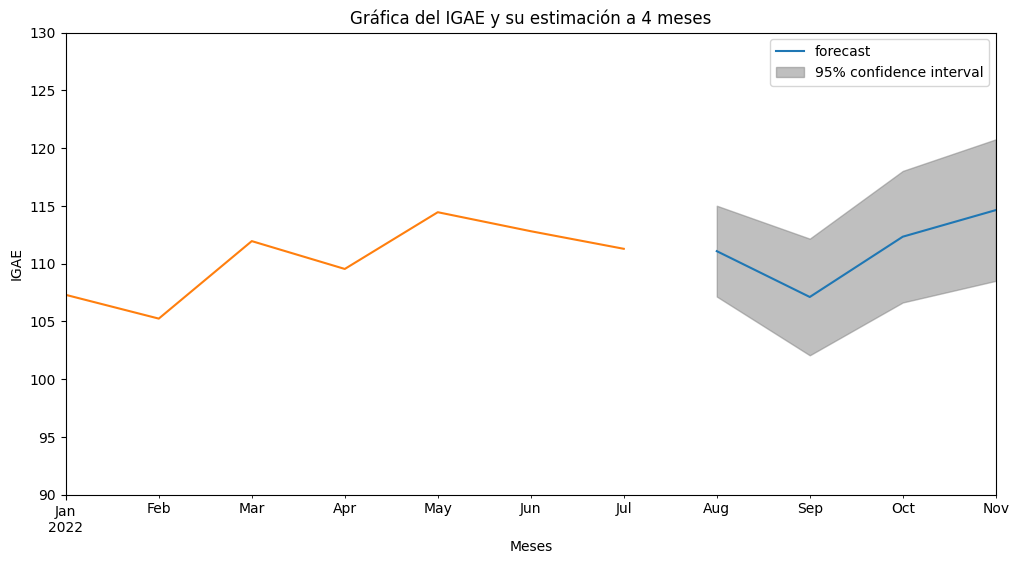

In [68]:
# Definir el inicio y fin del pronóstico
inicio = '2022-08-01'
fin4 = '2022-11-01'

# Gráfica del pronóstico a 1 mes
plot_predict(results, inicio, fin4)
igae['IGAE'].plot(figsize=(12,6))
plt.title('Gráfica del IGAE y su estimación a 4 meses')
plt.xlabel('Meses')
plt.ylabel('IGAE')
plt.xlim('2022-01-01', fin4)
plt.ylim(90,130)
plt.show()

In [63]:
# Pronóstico a 4 mes y sus intervalos de confianza
forecast4 = results.get_forecast(steps=4)
forecast4_mean = forecast4.predicted_mean
forecast4_ci = forecast4.conf_int()

In [64]:
# Intervalos de confinza
forecast4_values = forecast4_mean[inicio:fin4]
forecast4_int = forecast4_ci.loc[inicio:fin4]

# Juntar en un DataFrame
df_forecast4 = pd.DataFrame({'pronóstico': forecast4_values, 
                            'límite inferior': forecast4_int['lower IGAE'], 
                            'límite superior': forecast4_int['upper IGAE']})
df_forecast4

,pronóstico,límite inferior,límite superior
2022-08-01,111.071466,107.139774,115.003159
2022-09-01,107.102644,102.054151,112.151137
2022-10-01,112.322505,106.629123,118.015887
2022-11-01,114.624623,108.499863,120.749382


In [66]:
print(f'Pronósticamos que para el mes de noviembre de 2022, el IGAE estimado será igual a {df_forecast4.iloc[3,0].round(4)}.\n Sin embargo, esta cantidad puede variar entre {df_forecast4.iloc[3,1].round(4)} y {df_forecast4.iloc[3,2].round(4)}.')

Pronósticamos que para el mes de noviembre de 2022, el IGAE estimado será igual a 114.6246.
 Sin embargo, esta cantidad puede variar entre 108.4999 y 120.7494.


**PRONÓSTICO A 5 MESES**

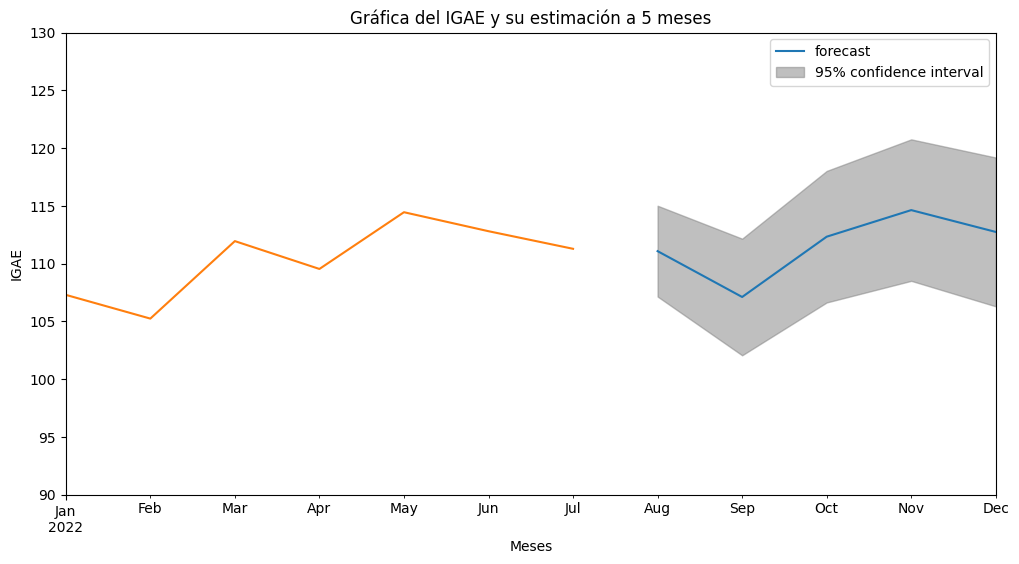

In [70]:
# Definir el inicio y fin del pronóstico
inicio = '2022-08-01'
fin5 = '2022-12-01'

# Gráfica del pronóstico a 1 mes
plot_predict(results, inicio, fin5)
igae['IGAE'].plot(figsize=(12,6))
plt.title('Gráfica del IGAE y su estimación a 5 meses')
plt.xlabel('Meses')
plt.ylabel('IGAE')
plt.xlim('2022-01-01', fin5)
plt.ylim(90,130)
plt.show()

In [74]:
# Pronóstico a 4 mes y sus intervalos de confianza
forecast5 = results.get_forecast(steps=5)
forecast5_mean = forecast5.predicted_mean
forecast5_ci = forecast5.conf_int()

In [75]:
# Intervalos de confinza y valores del pronóstico
forecast5_values = forecast5_mean[inicio:fin5]
forecast5_int = forecast5_ci.loc[inicio:fin5]

# Juntar en un DataFrame
df_forecast5 = pd.DataFrame({'pronóstico': forecast5_values, 
                            'límite inferior': forecast5_int['lower IGAE'], 
                            'límite superior': forecast5_int['upper IGAE']})
df_forecast5

,pronóstico,límite inferior,límite superior
2022-08-01,111.071466,107.139774,115.003159
2022-09-01,107.102644,102.054151,112.151137
2022-10-01,112.322505,106.629123,118.015887
2022-11-01,114.624623,108.499863,120.749382
2022-12-01,112.734689,106.292813,119.176564


In [78]:
print(f'Pronósticamos que para el mes de diciembre de 2022, el IGAE estimado será igual a {df_forecast5.iloc[4,0].round(4)}.\n Sin embargo, esta cantidad puede variar entre {df_forecast5.iloc[4,1].round(4)} y {df_forecast5.iloc[4,2].round(4)}.')

Pronósticamos que para el mes de diciembre de 2022, el IGAE estimado será igual a 112.7347.
 Sin embargo, esta cantidad puede variar entre 106.2928 y 119.1766.
